# 1. Acquire and preprocess the IMDB

In [ ]:

import pandas as pd
import numpy as np
import os
import string
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Set the seed for reproducibility (initializes the random number generator)
np.random.seed(500)
     

## 1.1 Download tar.gz and Some Preprocessing

### 1.1.1 Download and Unzip

In [ ]:
!wget "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
!tar -xzvf "aclImdb_v1.tar.gz" ""




Streaming output truncated to the last 5 lines.
aclImdb/train/unsup/49925_0.txt
aclImdb/train/unsup/49924_0.txt
aclImdb/train/unsup/49923_0.txt
aclImdb/train/unsup/49922_0.txt
aclImdb/train/unsup/49921_0.txt
aclImdb/train/unsup/49920_0.txt


### 1.1.2 More Preprocessing


In [ ]:
import re
import string
import nltk
from nltk import pos_tag, word_tokenize          
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = stopwords.words('english')
     

# Lemmatize and Tokenize
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in tokenizer.tokenize(text.lower())])

# Remove stopwords
def remove_stopwords(text):
  return ' '.join([word for word in text.split() if word not in (stop_words)])

# Remove numbers
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
strip = lambda x: " ".join(str.rsplit(x))

# Remove punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Preprocessing Training Comments

Here we remove useless words, punctuation, numbers, etc

In [ ]:
# convert for preprocessing

wordCountTrainingPosPre = 0
wordCountTrainingNegPre = 0

wordCountTrainingPosPost = 0
wordCountTrainingNegPost = 0

wordCountTestingPosPre = 0
wordCountTestingNegPre = 0

wordCountTestingPosPost = 0
wordCountTestingNegPost = 0

neg_train_comments = []

for commentFile in os.listdir("/content/aclImdb/train/neg"):
# for testes in os.listdir(os.getcwd()):

  with open("/content/aclImdb/train/neg/" + commentFile, "r") as f:
    
    for line in f:

      wordCountTrainingNegPre += len(line.split())

      line = lemmatize_text(line)
      line = remove_stopwords(line)
      line = alphanumeric(line)
      line = strip(line)

      wordCountTrainingNegPost += len(line.split())

      neg_train_comments.append(remove_punctuations(line))


pos_train_comments = []

for commentFile in os.listdir("/content/aclImdb/train/pos"):
# for testes in os.listdir(os.getcwd()):

  with open("/content/aclImdb/train/pos/" + commentFile, "r") as f:

    for line in f:

      wordCountTrainingPosPre += len(line.split())

      line = lemmatize_text(line)
      line = remove_stopwords(line)
      line = alphanumeric(line)
      line = strip(line)

      wordCountTrainingPosPost += len(line.split())

      pos_train_comments.append(remove_punctuations(line))


print("=====================Negative Training Comment Sample====================")
print(neg_train_comments[0:2])

print("=====================Positive Training Comment Sample====================")
print(pos_train_comments[0:2])


=====================Negative Training Comment Sample====================
['possibly worst fencing sword fighting movie ever made called sport fencing poor plot character weak got throw semi nude sex scene later supposed group dancing around fencing scene fencing club trying suppose maintain audience interest waste f murray abraham talent better served overblown swashbuckling movie like zorro scaramouche anything ha basil rathbone villain fencer recognize near impossibility capturing fencing sport film ever happens got fresher better drawn character plot depth', 'expect script begin therefore nothing director work hayek farrell donaldson kirkin good actor anything say anything react even earthquake wa pretty poor know closely movie follows novel two jewish girl show nowhere show arturo ha nice warm heart stereotype amount anything even buries camilla desert instead bringing back l nice catholic burial could least bring flower pathetic l set wa ridiculously graphically created anything 

### Testing Comments

Here we remove useless words, punctuation, numbers, etc

In [ ]:
# convert for preprocessing
neg_test_comments = []

for commentFile in os.listdir("/content/aclImdb/test/neg"):
# for testes in os.listdir(os.getcwd()):

  with open("/content/aclImdb/test/neg/" + commentFile, "r") as f:
    
    for line in f:
      
      wordCountTestingNegPre += len(line.split())

      line = lemmatize_text(line)
      line = remove_stopwords(line)
      line = alphanumeric(line)
      line = strip(line)

      wordCountTestingNegPost += len(line.split())

      neg_test_comments.append(remove_punctuations(line))


pos_test_comments = []

for commentFile in os.listdir("/content/aclImdb/test/pos"):
# for testes in os.listdir(os.getcwd()):

  with open("/content/aclImdb/test/pos/" + commentFile, "r") as f:

    for line in f:

      wordCountTestingPosPre += len(line.split())

      line = lemmatize_text(line)
      line = remove_stopwords(line)
      line = alphanumeric(line)
      line = strip(line) 

      wordCountTestingPosPost += len(line.split())

      pos_test_comments.append(remove_punctuations(line))


print("=====================Negative Testing Comment Sample====================")
print(neg_test_comments[0])

print("=====================Positive Testing Comment Sample====================")
print(pos_test_comments[0])


=====================Negative Testing Comment Sample====================
one worst anime series ever seen watched manga review magazine thought wa maybe interesting got chapter realized wa complete stupidity br br ok first chapter ok series standard plot advance becomes totally incoherent series try show mystical based upon christian mythology total stupidity feature demon stigma scene totally nonsense seems series try seem deeply thought complex mythologically reviewed watcher bit brain cultural reference realize soon element used real sense put impress ignorant watcher br br final chapter full totally nonsense element battle cat eared demon reference supposed fight demon demon control time apparent reason final totally nonsense ignorant watcher see floating final give place meditate truth final complete series total incoherent incongruent nonsense
=====================Positive Testing Comment Sample====================
america multi cultural many sub culture movie simply tell story s

## Converting to Dataframe

In [ ]:
negTraining = {'polarity' : 0, 'comment' : neg_train_comments}

training = pd.DataFrame(negTraining, columns=['polarity', 'comment']) 

posTraining = {'polarity' : 1, 'comment' : pos_train_comments}

posTraining = pd.DataFrame(posTraining, columns=['polarity', 'comment']) 

training = pd.concat([posTraining, training])

negTesting = {'polarity' : 0, 'comment' : neg_test_comments}

testing = pd.DataFrame(negTesting, columns=['polarity', 'comment']) 

posTesting = {'polarity' : 1, 'comment' : pos_train_comments}

posTesting = pd.DataFrame(posTesting, columns=['polarity', 'comment']) 

testing = pd.concat([posTesting, testing])



training


,polarity,comment
0,1,film start slowly lifestyle wallace napalm att...
1,1,first saw movie wa year old unfortunately coul...
2,1,ha got best spy adventure series tv ever aired...
3,1,beautiful film pure cassavetes style gena rowl...
4,1,tom berenger put soul sgt barnes ha done thoma...
...,...,...
12495,0,carl panzram lived amazing life scribbled memo...
12496,0,imagine looked forward king ant massive gordon...
12497,0,group forest ranger scientist go wood find fos...
12498,0,twentieth century fox made ton mr moto film ho...


## 1.3 Statistical Analysis

### 1.3.1 Positive + Negative Distributions

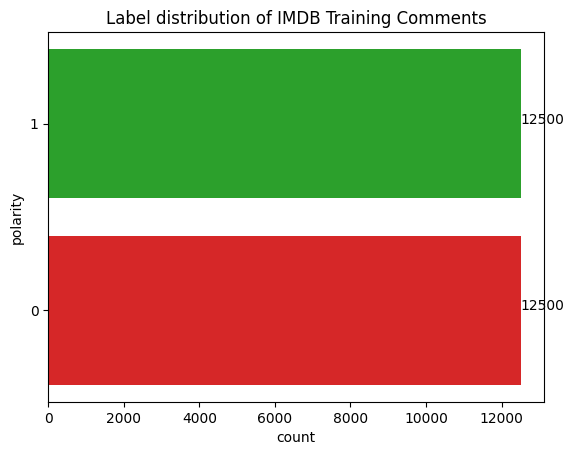

In [ ]:


negative = training[training['polarity']==0].shape[0]
positive = training[training['polarity']==1].shape[0]
x = ["0", "1"]
y = [negative, positive]
plt.title("Label distribution of IMDB Training Comments")
plt.ylabel('polarity')
plt.xlabel('count')
colors = ['tab:red','tab:green']
plt.barh(x, y, color = colors)

for index, value in enumerate(y):
    plt.text(value, index, str(value))
     

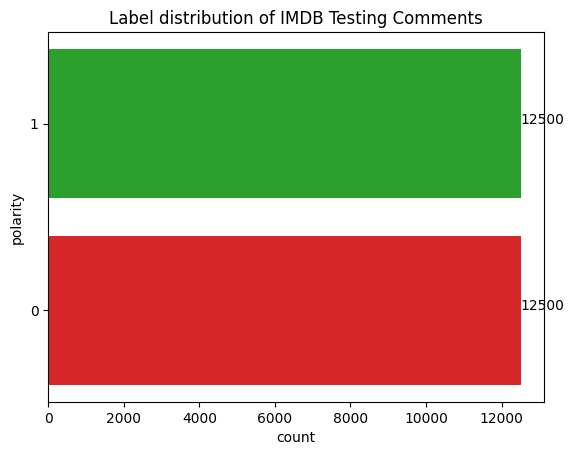

In [ ]:


negative = testing[testing['polarity']==0].shape[0]
positive = testing[testing['polarity']==1].shape[0]
x = ["0", "1"]
y = [negative, positive]
plt.title("Label distribution of IMDB Testing Comments")
plt.ylabel('polarity')
plt.xlabel('count')
colors = ['tab:red','tab:green']
plt.barh(x, y, color = colors)

for index, value in enumerate(y):
    plt.text(value, index, str(value))
     

### 1.3.2 Word Count Before and After Processing

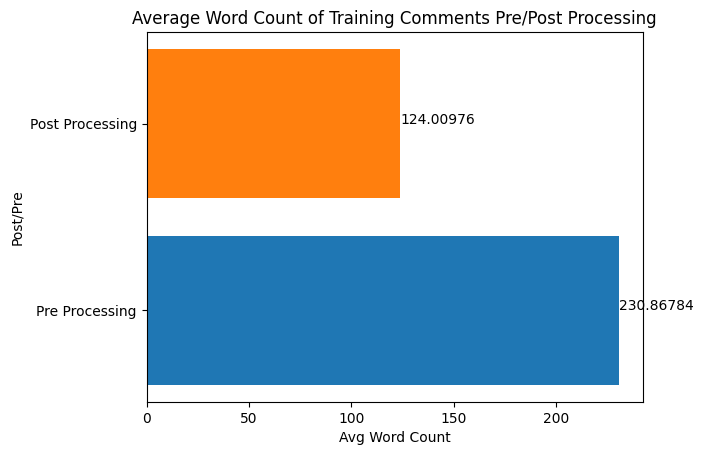

In [ ]:

x = ["Pre Processing", "Post Processing"]
y = [wordCountTrainingNegPre / 12500, wordCountTrainingNegPost / 12500]
plt.title("Average Word Count of Training Comments Pre/Post Processing")
plt.ylabel('Post/Pre')
plt.xlabel('Avg Word Count')
colors = ['tab:blue','tab:orange']
plt.barh(x, y, color = colors)

for index, value in enumerate(y):
    plt.text(value, index, str(value))

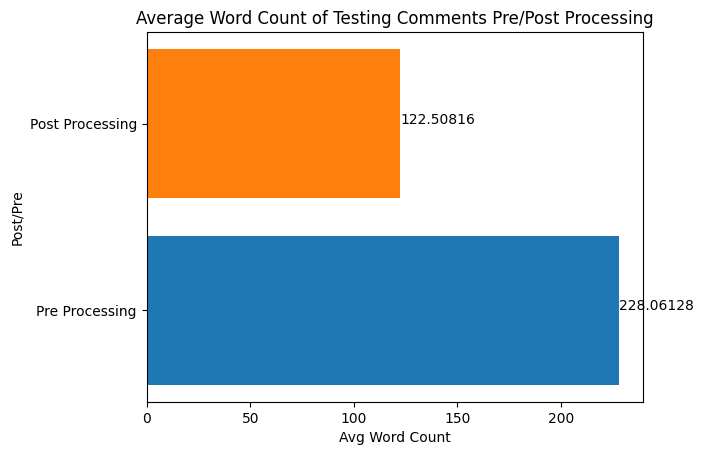

In [ ]:

x = ["Pre Processing", "Post Processing"]
y = [wordCountTestingNegPre / 12500, wordCountTestingNegPost / 12500]
plt.title("Average Word Count of Testing Comments Pre/Post Processing")
plt.ylabel('Post/Pre')
plt.xlabel('Avg Word Count')
colors = ['tab:blue','tab:orange']
plt.barh(x, y, color = colors)

for index, value in enumerate(y):
    plt.text(value, index, str(value))

## 1.4 Extracting Features

In [ ]:
## TRAINING
vectorizer_training = CountVectorizer(min_df=0.001)

matrix_training = vectorizer_training.fit_transform(training['comment'])

matrix_training = matrix_training.toarray()

df_training = pd.DataFrame(data = matrix_training, columns = vectorizer_training.get_feature_names_out())

## TESTING
vectorizer_testing = CountVectorizer(vocabulary=vectorizer_training.vocabulary_, min_df=0.001)

matrix_testing = vectorizer_testing.fit_transform(testing['comment'])

matrix_testing = matrix_testing.toarray()

df_testing = pd.DataFrame(data = matrix_testing, columns = vectorizer_testing.get_feature_names_out())



In [ ]:
print(matrix_training.shape)
print(matrix_testing.shape)

(25000, 9244)
(25000, 9244)


# 2. Implement the Model

## 2.1 Naive Bayes Model

In [ ]:
class NaiveBayes(object):
    # set alpha to be 1 by default
    def __init__(self, alpha):
        self.alpha = alpha

    def fit(self, X, y):
        # count number of data points or samples
        count_sample = X.shape[0]

        # Check each class and count 
        classes = [[x for x, t in zip(X, y) if t == c] for c in np.unique(y)]
        # Calculate the prior
        self.class_log_prior_ = [np.log(len(i) / count_sample) for i in classes]

        # calculate count of each word for each class and add self.alpha as smoothing
        count = np.array([np.array(i).sum(axis=0) for i in classes]) + self.alpha

        # calculate the log probability of each word
        self.feature_log_prob_ = np.log(count / count.sum(axis=1)[np.newaxis].T)
        return self

    def predict_log_proba(self, X):
        return [(self.feature_log_prob_ * x).sum(axis=1) + self.class_log_prior_
                for x in X]

    def predict(self, X):
        # maximize probability
        return np.argmax(self.predict_log_proba(X), axis=1)

# evaluate accuracy
def evaluate_acc(y_pred, y_true):
  # returns the mean accuracy
  count = 0
  for i in range(len(y_pred)):
      if y_pred.tolist()[i] == y_true.tolist()[i]:
          count+=1
  return count/len(y_pred) 

     

In [ ]:
modelNB = NaiveBayes(0.1)

modelNB.fit(matrix_training, training['polarity'])

training_acc_NB = evaluate_acc(modelNB.predict(matrix_training),  training['polarity'])

testing_acc_NB = evaluate_acc(modelNB.predict(matrix_testing),  testing['polarity'])


In [ ]:
print("Training Accuracy - Multinomial Naive Bayes:", training_acc_NB)
print("Testing Accuracy - Multinomial Naive Bayes:", testing_acc_NB)


Training Accuracy - Multinomial Naive Bayes: 0.86908
Testing Accuracy - Multinomial Naive Bayes: 0.86392


# 3. Run Experiments

## 3.1 In a single table, compare and report the performance of the Naive Bayes on the IMDB Reviews classification task.

In [ ]:

from prettytable import PrettyTable
resultTable = PrettyTable()
resultTable.title = "Best performance of Naive Bayes and BERT on testing datasets"
resultTable.field_names = ["Model", "Polarity"]


resultTable.add_row(['Naive Bayes - Training Accuracy', training_acc_NB])
resultTable.add_row(['Naive Bayes - Testing Accuracy', testing_acc_NB])
print(resultTable)

+---------------------------------+----------+
|              Model              | Polarity |
+---------------------------------+----------+
| Naive Bayes - Training Accuracy | 0.86908  |
|  Naive Bayes - Testing Accuracy | 0.86392  |
+---------------------------------+----------+


# 3.3 Comparing accuracy as a function of dataset size

## 3.3.1 Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split


def compare_naive_bayes_acc(x_train, y_train, x_test, y_test):
  training_size_list = [0.2, 0.4, 0.6, 0.8]
  acc_list = []
 
  for training_size in training_size_list:
    part_x_train, _, part_y_train, _ = \
      train_test_split(
          x_train,
          y_train,
          train_size=training_size,
          random_state=42,
          shuffle=True
        )
    
    model = NaiveBayes(alpha=0.1)
    model.fit(part_x_train, part_y_train)

    y_pred = model.predict(x_test)
    acc = evaluate_acc(y_pred, y_test)
    acc_list.append(acc)
    print("Acc with training_size (%s) = %s\n" % (training_size, acc))
  training_size_list.append(1.0)
  model = NaiveBayes(0.1)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc = evaluate_acc(y_pred, y_test)
  acc_list.append(acc)
  print("Acc with training_size (%s) = %s\n" % (1, acc))
  best_acc  = max(acc_list)
  idx = acc_list.index(best_acc)

  print("Best accuracy training_size with %s = %s\n" % (training_size_list[idx], best_acc))
  return acc_list
     

In [ ]:
NB_accList_test1 = compare_naive_bayes_acc(matrix_training, training['polarity'], matrix_testing, testing['polarity'])


Acc with training_size (0.2) = 0.85192

Acc with training_size (0.4) = 0.86192

Acc with training_size (0.6) = 0.8636

Acc with training_size (0.8) = 0.86376

Acc with training_size (1) = 0.86392

Best accuracy training_size with 1.0 = 0.86392



<Figure size 640x480 with 0 Axes>

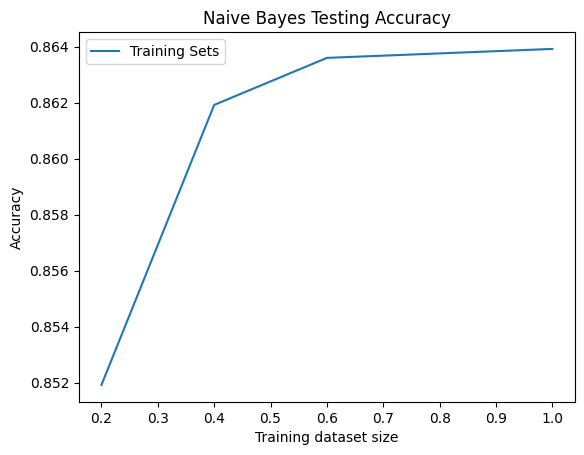

<Figure size 640x480 with 0 Axes>

In [ ]:


training_size_list = [0.2, 0.4, 0.6, 0.8, 1.0]
# plot 
plt.plot(training_size_list, NB_accList_test1, label ="Training Sets")
plt.xlabel('Training dataset size')
plt.ylabel('Accuracy')
plt.title("Naive Bayes Testing Accuracy")
plt.legend()
plt.figure()

## 3.4 Count Vectorizer vs TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid_vect_train = TfidfVectorizer(min_df=0.001)

tfid_matrix_training = tfid_vect_train.fit_transform(training['comment'])
tfid_matrix_training = tfid_matrix_training.toarray()

tfid_vect_test = TfidfVectorizer(vocabulary=tfid_vect_train.vocabulary_, min_df=0.001)

tfid_matrix_testing = tfid_vect_test.fit_transform(training['comment'])
tfid_matrix_testing = tfid_matrix_testing.toarray()

TFIDmodelNB = NaiveBayes(0.1)

TFIDmodelNB.fit(tfid_matrix_training, training['polarity'])

training_acc_NB_TFID = evaluate_acc(TFIDmodelNB.predict(tfid_matrix_training),  training['polarity'])

testing_acc_NB_TFID = evaluate_acc(TFIDmodelNB.predict(tfid_matrix_testing),  testing['polarity'])


In [ ]:

from prettytable import PrettyTable
resultTable = PrettyTable()
resultTable.title = "Best performance of Naive Bayes and BERT on testing datasets"
resultTable.field_names = ["Model", "Polarity"]


resultTable.add_row(['Naive Bayes CountVectorizer - Training Accuracy', training_acc_NB])
resultTable.add_row(['Naive Bayes CountVectorizer - Testing Accuracy', testing_acc_NB])
resultTable.add_row(['Naive Bayes TFID - Training Accuracy', training_acc_NB_TFID])
resultTable.add_row(['Naive Bayes TFID - Testing Accuracy', training_acc_NB_TFID])
print(resultTable)

+-------------------------------------------------+----------+
|                      Model                      | Polarity |
+-------------------------------------------------+----------+
| Naive Bayes CountVectorizer - Training Accuracy | 0.86908  |
|  Naive Bayes CountVectorizer - Testing Accuracy | 0.86392  |
|       Naive Bayes TFID - Training Accuracy      | 0.88072  |
|       Naive Bayes TFID - Testing Accuracy       | 0.88072  |
+-------------------------------------------------+----------+


# 3.5 The effect of min_df on accuracy


In [ ]:
lstOfMinDF = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]
lstOfTrainAcc = []
lstOfTestAcc = []

for minDF in lstOfMinDF:
  print(minDF)

  # TRAINING
  vectorizer_training = CountVectorizer(min_df=minDF)
  matrix_training = vectorizer_training.fit_transform(training['comment'])
  matrix_training = matrix_training.toarray()

  # TESTING
  vectorizer_testing = CountVectorizer(vocabulary=vectorizer_training.vocabulary_, min_df=minDF)
  matrix_testing = vectorizer_testing.fit_transform(testing['comment'])
  matrix_testing = matrix_testing.toarray()


  # GET ACCURACY
  modelNB = NaiveBayes(0.1)

  modelNB.fit(matrix_training, training['polarity'])

  training_acc_NB = evaluate_acc(modelNB.predict(matrix_training),  training['polarity'])

  testing_acc_NB = evaluate_acc(modelNB.predict(matrix_testing),  testing['polarity'])

  # APPEND DATA
  lstOfTrainAcc.append(training_acc_NB)
  lstOfTestAcc.append(testing_acc_NB)



0.5
0.1
0.05
0.01
0.005
0.001


[0.54304, 0.7308, 0.79996, 0.8446, 0.85184, 0.86908]
[0.54384, 0.73428, 0.8036, 0.8468, 0.85288, 0.86392]


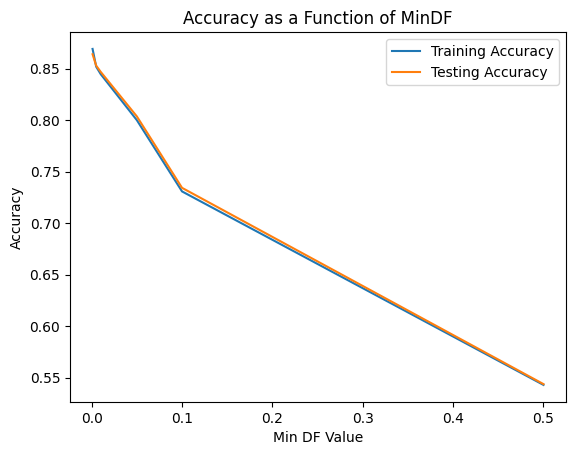

In [ ]:
print(lstOfTrainAcc)
print(lstOfTestAcc)

plt.title("Accuracy as a Function of MinDF")
plt.plot(lstOfMinDF, lstOfTrainAcc , '-', label='Training Accuracy')
plt.plot(lstOfMinDF, lstOfTestAcc , '-', label='Testing Accuracy')
plt.legend()
plt.xlabel('Min DF Value')
plt.ylabel('Accuracy')
plt.show() 

# 3.6 Gaussian Naive Bayes

In [ ]:

class GaussianNaiveBayes(object):
    def fit(self, X, y):
        # Store the mean and standard deviation for each feature in each class
        self.class_mean_ = []
        self.class_std_ = []
        self.class_prior_ = []
        unique_classes = np.unique(y)
        
        for c in unique_classes:
            X_c = X[y == c]
            mean = X_c.mean(axis=0)
            std = X_c.std(axis=0)
            self.class_mean_.append(mean)
            self.class_std_.append(std)
            self.class_prior_.append(np.log(len(X_c) / len(X)))

    def predict_log_proba(self, X):
        # Calculate the log probability of each class for each sample
        log_probs = []
        for i in range(len(X)):
            sample_log_probs = []
            for j in range(len(self.class_mean_)):
                mean = self.class_mean_[j]
                std = self.class_std_[j]
                prior = self.class_prior_[j]
                log_prob = np.sum(np.log((1 / (np.sqrt(2 * np.pi) * std)) *
                                       np.exp(-(X[i] - mean) ** 2 / (2 * std ** 2))))
                sample_log_probs.append(prior + log_prob)
            log_probs.append(sample_log_probs)
        return np.array(log_probs)

    def predict(self, X):
        # Maximize probability and predict class
        log_probs = self.predict_log_proba(X)
        return np.argmax(log_probs, axis=1)


In [ ]:
modelGaussian = GaussianNaiveBayes()

modelGaussian.fit(matrix_training, training['polarity'])

training_acc_GNB = evaluate_acc(modelGaussian.predict(matrix_training),  training['polarity'])

testing_acc_GNB = evaluate_acc(modelGaussian.predict(matrix_testing),  testing['polarity'])


In [ ]:
# print("Training Accuracy - Multinomial Naive Bayes:", training_acc_NB)
# print("Testing Accuracy - Multinomial Naive Bayes:", testing_acc_NB)
print("Training Accuracy - Gaussian Naive Bayes:", training_acc_GNB)
print("Testing Accuracy - Gaussian Naive Bayes:", testing_acc_GNB)